<h1>Task 6: K-Nearest Neighbors (KNN) Classification</h1>


<h2>Objective: Understand and implement KNN for classification problems.<br>
Tools: Tools: Scikit-learn, Pandas, Matplotlib</h2>


<h3>Task to be performed:</h3>
<ol>
<li>Choose a classification dataset and normalize features.
<li>Use KNeighborsClassifier from sklearn.
<li>Experiment with different values of K.
<li>Evaluate model using accuracy, confusion matrix.
<li>Visualize decision boundaries.
</ol>

<h3>Dataset:- Iris Dataset downloaded from Kaggle </h3>

In [1]:
#Import required libabries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

<h5>T-1:- Choose a classification dataset and normalize features.</h5>

In [2]:
#Load Dataset
df = pd.read_csv("Iris.csv")
df.drop("Id", axis=1, inplace=True)  # drop ID column if present

In [3]:
#Encode target labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [4]:
#Features and target
X = df.drop("Species", axis=1)
y = df["Species"]

In [5]:
#Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Use only two features for 2D visualization
X_vis = X_scaled[:, :2]

<h5>T-2:- Use KNeighborsClassifier from sklearn.</h5>
<h5>T-3:- Experiment with different values of K.</h5>
<h5>T-4:- Evaluate model using accuracy, confusion matrix.</h5>

In [7]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_vis, X_test_vis = X_vis[y_train.index], X_vis[y_test.index]


📌 K = 1
Accuracy: 0.97


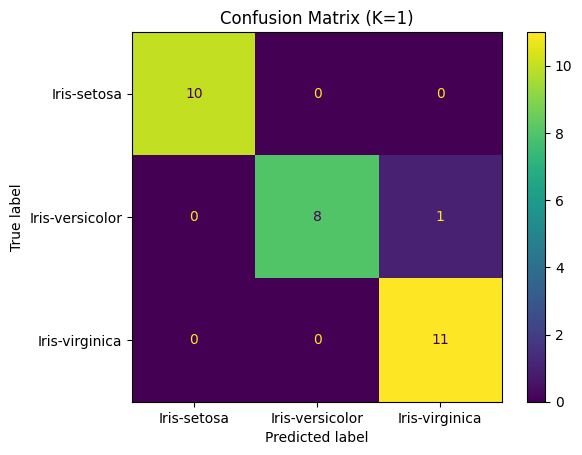


📌 K = 3
Accuracy: 1.0


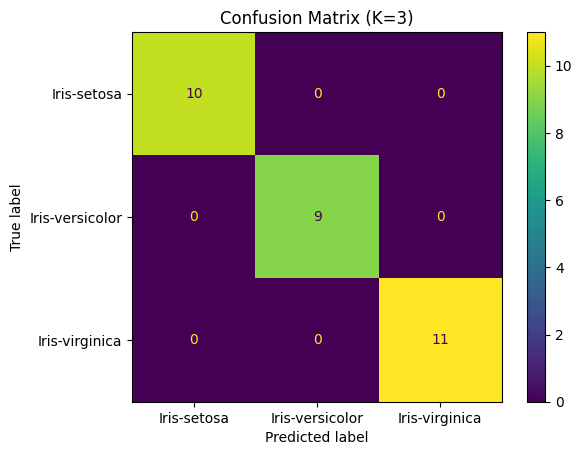


📌 K = 5
Accuracy: 1.0


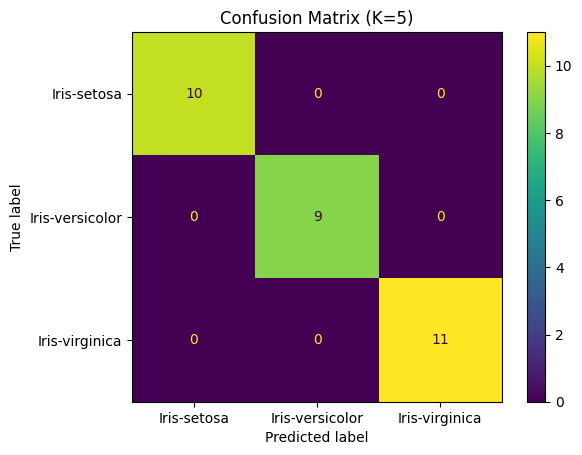


📌 K = 7
Accuracy: 1.0


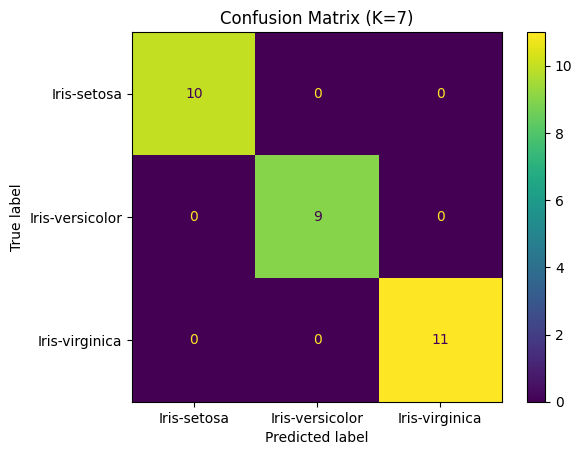

In [10]:
k_values = [1, 3, 5, 7]
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📌 K = {k}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()
    plt.title(f"Confusion Matrix (K={k})")
    plt.grid(False)
    plt.show()

<h5>T-5:- Visualize decision boundaries.</h5>

In [14]:
def plot_decision_boundary(X, y, model, title):
    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
    cmap_bold = ["red", "green", "blue"]

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(X[y == cls, 0], X[y == cls, 1], label=le.classes_[cls],
                    edgecolor='k', c=cmap_bold[idx])
    plt.title(title)
    plt.xlabel("Feature 1 (Standardized)")
    plt.ylabel("Feature 2 (Standardized)")
    plt.legend()
    plt.tight_layout()
    plt.show()

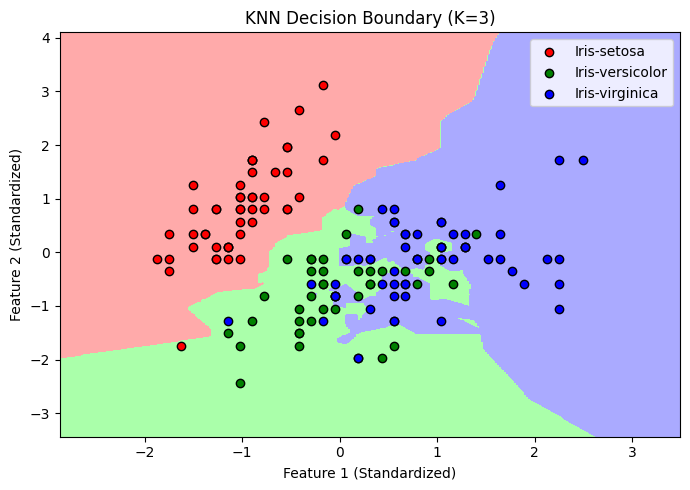

In [13]:
model_2d = KNeighborsClassifier(n_neighbors=3)
model_2d.fit(X_vis, y)

plot_decision_boundary(X_vis, y, model_2d, "KNN Decision Boundary (K=3)")